In [1]:
import pandas as pd
df1=pd.read_excel('Новый диплом датасет.xlsx', sheet_name = 0)
dfAB=pd.read_excel('Новый диплом датасет.xlsx', sheet_name = 1)
dfcity=pd.read_excel('Новый диплом датасет.xlsx', sheet_name = 2)

In [2]:
#Просматриваем первый датафрейм df1. Определяем, что имеются NaN в id_client

In [3]:
df1

,id_order,id_client,amt_payment,dtime_pay
0,100238,194569.0,5373.0,2022-10-28 04:05:15.221000
1,100242,191056.0,4151.0,2022-08-01 02:42:54.992000
2,100249,200049.0,5688.0,2022-08-24 12:45:12.744000
3,100258,206161.0,4330.0,2022-12-09 15:13:26.437000
4,100267,190945.0,5488.0,2022-08-03 02:07:31.468000
...,...,...,...,...
37984,297586,NaN,NaN,NaN
37985,297593,179230.0,5755.0,2022-09-05 03:29:07.726000
37986,297595,192530.0,4448.0,2022-09-27 23:50:05.734000
37987,297601,183888.0,1746.0,2022-10-13 14:23:03.073000


In [4]:
#убираем строки где не определен id_client

In [5]:
df1=df1.dropna(subset=['id_client'])

In [6]:
#просматриваем dfAB и определяемся,что NaT не сможет повлиять на результаты.

In [7]:
dfAB

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
1,193942,NaT,0,13
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015
...,...,...,...,...
55600,193038,2022-07-09 00:31:25.196,0,1015
55601,244069,2022-08-08 00:12:31.319,1,991
55602,189084,2022-06-29 04:34:42.610,1,439
55603,182758,2022-06-13 11:28:37.856,1,573


In [8]:
#просматриваем dfcity и определяемся,что NaT отсутсвтует 

In [9]:
dfcity

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир
...,...,...
61,3987,Москва
62,6543,Москва
63,8543,Москва
64,9121,Москва


In [10]:
#Строим распределение точек по городам

In [11]:
df_city_tp=dfcity.groupby('city').count()['id_trading_point'].reset_index().sort_values(by=['id_trading_point'], ascending=False)

In [12]:
df_city_tp

,city,id_trading_point
15,Санкт-Петербург,11
7,Москва,11
4,Казань,6
10,Новосибирск,6
6,Красноярск,5
5,Краснодар,4
14,Самара,4
8,Мурманск,2
18,Сочи,2
16,Саратов,2


In [13]:
#Визуализируем

Text(0, 0.5, 'Количество точек')

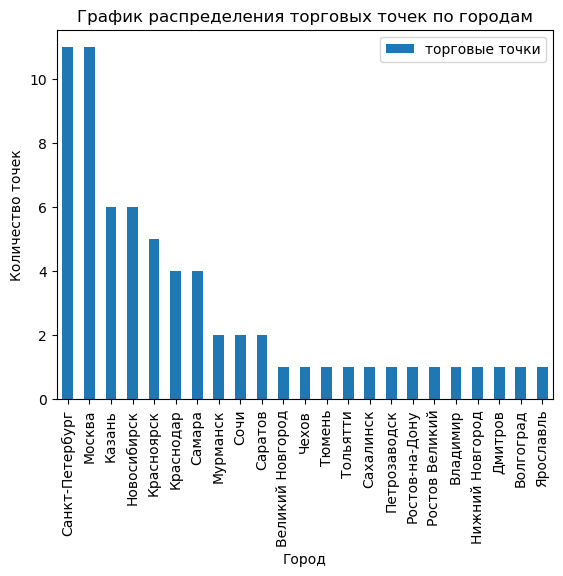

In [14]:
import matplotlib.pyplot as plt
df_city_tp.plot(x='city', y='id_trading_point', kind='bar', label = 'торговые точки')
plt.title('График распределения торговых точек по городам')
plt.xlabel('Город')
plt.ylabel('Количество точек')


In [15]:
#делаем группировку по клиентам с суммой платежей 

In [16]:
df_cl_pay=df1.groupby('id_client').sum()['amt_payment'].reset_index()

C:\Users\Маргарита\AppData\Local\Temp\ipykernel_10780\2050368966.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cl_pay=df1.groupby('id_client').sum()['amt_payment'].reset_index()


In [17]:
#Присоединяем к датафрейму dfAB суммы платежей клиентов

In [18]:
df=pd.merge(dfAB,df_cl_pay,how='left')


In [19]:
#просматривает датафрейм с целью выявления присутствия id_client которые не совершили покупку

In [20]:
df.sort_values(by=['amt_payment'], ascending=False)

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment
55263,195273,2022-07-14 17:04:42.314,1,991,43083.0
28269,203282,2022-08-03 18:06:06.065,1,516,42222.0
27416,180362,2022-06-07 14:23:04.234,0,544,38664.0
7674,194825,2022-07-13 13:46:19.072,0,516,36645.0
21233,192062,2022-07-06 14:56:58.319,0,699,36310.0
...,...,...,...,...,...
55596,331831,2022-07-01 04:28:28.282,0,55,NaN
55597,211355,2022-08-03 02:00:09.287,0,82,NaN
55598,260405,2022-08-15 02:47:58.960,0,576,NaN
55601,244069,2022-08-08 00:12:31.319,1,991,NaN


In [21]:
#Заменяем NaN на 0


In [22]:
df=df.fillna(0)

In [23]:
#добавляем к датафрейму место расположения торговых точек по городам городов

In [24]:
df_all=pd.merge(df,dfcity)
df_all.head()

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city
0,180844,2022-06-08 18:38:41.414000,0,212,5349.0,Красноярск
1,223863,2022-08-20 21:56:54.325000,0,212,0.0,Красноярск
2,201715,2022-07-30 19:07:49.264000,1,212,4171.0,Красноярск
3,292010,2022-07-26 20:37:16.885000,1,212,0.0,Красноярск
4,190438,2022-07-02 12:53:04.753000,1,212,6026.0,Красноярск


In [25]:
#Создаем колонку Флаг о совершении либо отсутствии оплаты

In [26]:
import numpy as np
df_all['pay_flag']=np.where(df_all['amt_payment']==0,0,1)
df_all.head()

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city,pay_flag
0,180844,2022-06-08 18:38:41.414000,0,212,5349.0,Красноярск,1
1,223863,2022-08-20 21:56:54.325000,0,212,0.0,Красноярск,0
2,201715,2022-07-30 19:07:49.264000,1,212,4171.0,Красноярск,1
3,292010,2022-07-26 20:37:16.885000,1,212,0.0,Красноярск,0
4,190438,2022-07-02 12:53:04.753000,1,212,6026.0,Красноярск,1


In [27]:
#Создаем функцию для подсчета значения t-критерия (критерия Стьюдента) и p_value

In [28]:
from scipy.stats import ttest_ind
def test_calc(r1, r2):
    s, p=ttest_ind(r1, r2)
    if (s>-1.96 and s<1.96):
        print('значения равны')
    else:
        if r1.mean() > r2.mean():
            print('значение 0  группы больше')
        else:
            print('значение тестовой группы больше')
    return s,p
    

In [29]:
#Создаем функцию для подсчета значения критерия Манна Уитни и p_value

In [30]:
from scipy.stats import mannwhitneyu
def mann_whitney_func(r1, r2, alpha=.05):
    
    s, p = mannwhitneyu(r1, r2)
    
    if p<alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
        
    return s, p

In [31]:
#Определяем точки, где оплата не происходила

In [32]:
df_cl=df_all.groupby('id_trading_point').sum()['amt_payment'].reset_index()

C:\Users\Маргарита\AppData\Local\Temp\ipykernel_10780\3184494391.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cl=df_all.groupby('id_trading_point').sum()['amt_payment'].reset_index()


In [33]:
df_zero=[]
for i in df_cl['id_trading_point']:
    point_data = df_cl[df_cl['id_trading_point'] == i]
    if (point_data['amt_payment'] == 0).any():
        df_zero.append(i)

In [34]:
df_zero

[1, 4, 7, 26]

In [35]:
#Определяем точки, где отсутствуют клиенты из тестовой или контрольной группы

In [36]:
df_zero_point=[]
for i in df_all['id_trading_point'].unique():
    tg0=df_all[(df_all['id_trading_point']==i)&(df_all['nflag_test']==0)].count()['id_client']
    tg1=df_all[(df_all['id_trading_point']==i)&(df_all['nflag_test']==1)].count()['id_client']
    if (tg0==0) or (tg1==0):
        df_zero_point.append(i)

In [37]:
df_zero_point

[1015, 866, 1099, 739, 228, 603, 810, 800]

In [38]:
#Убираем из датафрейма точки, где оплата не происходила

In [39]:
df_clear=df_all[~df_all['id_trading_point'].isin(df_zero+df_zero_point)]

In [40]:
df_clear.sort_values(by=['id_trading_point'], ascending=False)

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city,pay_flag
54343,283794,2022-07-22 01:29:27.080000,1,9931,0.0,Москва,0
54614,323265,2022-07-23 07:43:41.341000,0,9931,0.0,Москва,0
54417,289259,2022-08-18 06:26:01.725000,1,9931,0.0,Москва,0
54418,184271,2022-06-17 06:02:41.471000,1,9931,4613.0,Москва,1
54419,268945,2022-07-08 19:48:15.751000,1,9931,0.0,Москва,0
...,...,...,...,...,...,...,...
54751,280402,2022-08-25 17:33:41.797000,0,2,0.0,Дмитров,0
54752,309369,2022-08-05 19:18:10.796000,1,2,0.0,Дмитров,0
54753,269828,2022-08-09 07:47:25.789000,1,2,0.0,Дмитров,0
54754,255549,2022-08-13 15:58:01.715000,1,2,0.0,Дмитров,0


In [41]:
#Рассчитываем количество платежей в тестовой и контрольной группах и строим график

In [42]:
df_test=df_clear.groupby('nflag_test').count()['pay_flag'].reset_index()

In [43]:
df_test

,nflag_test,pay_flag
0,0,23659
1,1,23268


Text(0, 0.5, 'Количество платежей')

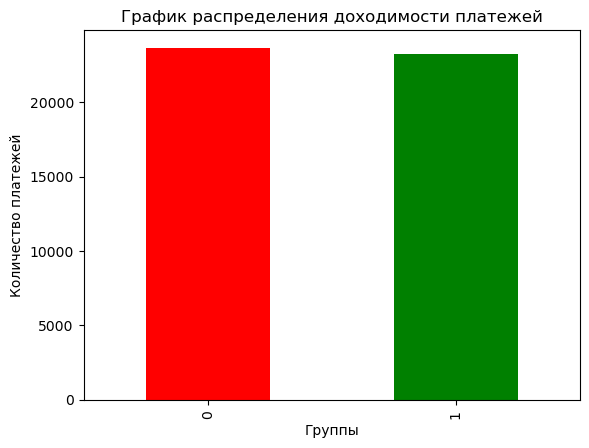

In [44]:
df_test.plot(x='nflag_test', y='pay_flag', kind='bar', color=['red', 'green'])
plt.legend('', frameon=False)
plt.title('График распределения доходимости платежей')
plt.xlabel('Группы')
plt.ylabel('Количество платежей')


In [45]:
#Прогоняем данные через созданные функции

In [46]:
test_calc(df_clear[df_clear['nflag_test']==0]['amt_payment'], df_clear[df_clear['nflag_test']==1]['amt_payment'])

значение тестовой группы больше


(-7.276120451887521, 3.489166865988976e-13)

In [47]:
test_calc(df_clear[df_clear['nflag_test']==0]['pay_flag'], df_clear[df_clear['nflag_test']==1]['pay_flag'])

значение тестовой группы больше


(-6.18364092301134, 6.315477502328519e-10)

In [48]:
mann_whitney_func(df_clear[df_clear['nflag_test']==0]['amt_payment'], df_clear[df_clear['nflag_test']==1]['amt_payment'], alpha=.05)

Распределения не равны


(265075721.0, 1.7375252140520593e-13)

In [49]:
mann_whitney_func(df_clear[df_clear['nflag_test']==0]['pay_flag'], df_clear[df_clear['nflag_test']==1]['pay_flag'], alpha=.05)

Распределения не равны


(267397880.0, 6.36207858774286e-10)

In [50]:
test_calc(df_clear[(df_clear['nflag_test']==0)&(df_clear['city']=='Москва')]['amt_payment'], df_clear[(df_clear['nflag_test']==1)&(df_clear['city']=='Москва')]['amt_payment'])

значение тестовой группы больше


(-7.896238614943352, 3.1166496296307097e-15)

In [51]:
test_calc(df_clear[(df_clear['nflag_test']==0)&(df_clear['city']=='Москва')]['pay_flag'], df_clear[(df_clear['nflag_test']==1)&(df_clear['city']=='Москва')]['pay_flag'])

значение тестовой группы больше


(-6.427576036124008, 1.3442208722377196e-10)

In [52]:
mann_whitney_func(df_clear[(df_clear['nflag_test']==0)&(df_clear['city']=='Москва')]['amt_payment'], df_clear[(df_clear['nflag_test']==1)&(df_clear['city']=='Москва')]['amt_payment'], alpha=.05)
mann_whitney_func(df_clear[(df_clear['nflag_test']==0)&(df_clear['city']=='Москва')]['pay_flag'], df_clear[(df_clear['nflag_test']==1)&(df_clear['city']=='Москва')]['pay_flag'], alpha=.05)

Распределения не равны
Распределения не равны


(17987623.0, 1.3888194541373183e-10)

In [53]:
for city in df_clear['city'].unique():
    a=city
    print('По городу', a)
    print('При сравнении показателя выручки')
    test_calc(df_clear[(df_clear['nflag_test']==0)&(df_clear['city']==a)]['amt_payment'], df_clear[(df_clear['nflag_test']==1)&(df_clear['city']==a)]['amt_payment'])
    print('При сравнении показателя конверсия')
    test_calc(df_clear[(df_clear['nflag_test']==0)&(df_clear['city']==a)]['pay_flag'], df_clear[(df_clear['nflag_test']==1)&(df_clear['city']==a)]['pay_flag'])
    print('При сравнении показателя выручки по mann_whitney')
    mann_whitney_func(df_clear[(df_clear['nflag_test']==0)&(df_clear['city']==a)]['amt_payment'], df_clear[(df_clear['nflag_test']==1)&(df_clear['city']==a)]['amt_payment'], alpha=.05)
    print('При сравнении показателя конверсияпо mann_whitney')
    mann_whitney_func(df_clear[(df_clear['nflag_test']==0)&(df_clear['city']==a)]['pay_flag'], df_clear[(df_clear['nflag_test']==1)&(df_clear['city']==a)]['pay_flag'], alpha=.05)

По городу Красноярск
При сравнении показателя выручки
значения равны
При сравнении показателя конверсия
значения равны
При сравнении показателя выручки по mann_whitney
Распределения равны
При сравнении показателя конверсияпо mann_whitney
Распределения равны
По городу Нижний Новгород
При сравнении показателя выручки
значения равны
При сравнении показателя конверсия
значения равны
При сравнении показателя выручки по mann_whitney
Распределения равны
При сравнении показателя конверсияпо mann_whitney
Распределения равны
По городу Мурманск
При сравнении показателя выручки
значения равны
При сравнении показателя конверсия
значения равны
При сравнении показателя выручки по mann_whitney
Распределения равны
При сравнении показателя конверсияпо mann_whitney
Распределения равны
По городу Казань
При сравнении показателя выручки
значения равны
При сравнении показателя конверсия
значения равны
При сравнении показателя выручки по mann_whitney
Распределения равны
При сравнении показателя конверсияпо ma

In [54]:
#Создаем итоговый датафрейм со всеми данными 

In [55]:
df_diplom = pd.DataFrame()
for i in df_clear['city'].unique():
    df_1 = df_clear[df_clear['city']==i]
    for j in df_1['id_trading_point'].unique():
        count_test=df_1[(df_1['id_trading_point']==j)&(df_1['nflag_test']==0)]['id_client'].count()
        count_control=df_1[(df_1['id_trading_point']==j)&(df_1['nflag_test']==1)]['id_client'].count()
        count_all=df_1[df_1['id_trading_point']==j]['id_client'].count()
        percent_count=df_1[df_1['id_trading_point']==j]['id_client'].count()/df_clear['id_client'].count()
        avg_payment_test=df_1[(df_1['id_trading_point']==j)&(df_1['nflag_test']==0)]['amt_payment'].mean()
        avg_payment_control=df_1[(df_1['id_trading_point']==j)&(df_1['nflag_test']==1)]['amt_payment'].mean()
        diff=avg_payment_control-avg_payment_test
        sigma_test=df_1[(df_1['id_trading_point']==j)&(df_1['nflag_test']==0)]['amt_payment'].std()
        sigma_control=df_1[(df_1['id_trading_point']==j)&(df_1['nflag_test']==1)]['amt_payment'].std()
        s, p=ttest_ind(df_1[(df_1['id_trading_point']==j)&(df_1['nflag_test']==0)]['amt_payment'], df_1[(df_1['id_trading_point']==j)&(df_1['nflag_test']==1)]['amt_payment'])
        if (diff >0)&(p<0.05):
            flag_res=1
        else:
            if (diff <0)&(p<0.05):
                flag_res=-1
            else:
                flag_res=0
        
       
        
        df_diplom = df_diplom.append({  'city':i, 'id_trading_point':j,'count_test':count_test,'count_control':count_control,
                               'count_all':count_all,'percent_count':percent_count,'avg_payment_test':avg_payment_test,
                               'avg_payment_control':avg_payment_control,'diff':diff,'sigma_test':sigma_test,
                               'sigma_control':sigma_control,'ttest':s,'pvalue_ttest':p,'flag_res':flag_res}, ignore_index=True)

C:\Users\Маргарита\AppData\Local\Temp\ipykernel_10780\4194578938.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_diplom = df_diplom.append({  'city':i, 'id_trading_point':j,'count_test':count_test,'count_control':count_control,
C:\Users\Маргарита\AppData\Local\Temp\ipykernel_10780\4194578938.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_diplom = df_diplom.append({  'city':i, 'id_trading_point':j,'count_test':count_test,'count_control':count_control,
C:\Users\Маргарита\AppData\Local\Temp\ipykernel_10780\4194578938.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_diplom = df_diplom.append({  'city':i, 'id_trading_point':j,'count_test':count_test,'count_control':count_control,
C:\Users\Маргарита\AppDat

C:\Users\Маргарита\AppData\Local\Temp\ipykernel_10780\4194578938.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_diplom = df_diplom.append({  'city':i, 'id_trading_point':j,'count_test':count_test,'count_control':count_control,
C:\Users\Маргарита\AppData\Local\Temp\ipykernel_10780\4194578938.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_diplom = df_diplom.append({  'city':i, 'id_trading_point':j,'count_test':count_test,'count_control':count_control,
C:\Users\Маргарита\AppData\Local\Temp\ipykernel_10780\4194578938.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_diplom = df_diplom.append({  'city':i, 'id_trading_point':j,'count_test':count_test,'count_control':count_control,
C:\Users\Маргарита\AppDat

In [56]:
#выгружаем данные в Excell

In [57]:
!pip install xlsxwriter

Defaulting to user installation because normal site-packages is not writeable


In [58]:
df_sheet1 = df_diplom[df_diplom['flag_res']==1]
df_sheet2 = df_diplom[df_diplom['flag_res']==-1]
df_sheet3 = df_diplom[df_diplom['flag_res']==0]

writer = pd.ExcelWriter("diplom.xlsx", engine="xlsxwriter")

df_sheet1.to_excel(writer, sheet_name="Sheet1")
df_sheet2.to_excel(writer, sheet_name="Sheet2")
df_sheet3.to_excel(writer, sheet_name="Sheet3")
writer.close()